In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import earthaccess
import h5netcdf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyinterp.backends.xarray  # Module that handles the filling of undefined values.
import pyinterp.fill
import seaborn as sns
import xarray as xr
from matplotlib.patches import Rectangle

In [2]:
auth = earthaccess.login()

In [57]:
tspan = ('2024-08-19','2024-09-20')
clouds = (0, 50)

In [51]:
results = earthaccess.search_datasets(instrument="spexone")
for item in results:
    summary = item.summary()
    print(summary["short-name"])

PACE_SPEXONE_L0
PACE_SPEXONE_L1A_SCI
PACE_SPEXONE_L1B_SCI
PACE_SPEXONE_L1C_SCI
PACE_SPEXONE_L2_AER_RTAPLAND
PACE_SPEXONE_L2_AER_RTAPLAND_NRT
PACE_SPEXONE_L2_AER_RTAPOCEAN
PACE_SPEXONE_L2_AER_RTAPOCEAN_NRT
PACE_SPEXONE_L3M_AER_RTAP
PACE_SPEXONE_L3M_AER_RTAPLAND
PACE_SPEXONE_L3M_AER_RTAPLAND_NRT
PACE_SPEXONE_L3M_AER_RTAPOCEAN
PACE_SPEXONE_L3M_AER_RTAPOCEAN_NRT
PACE_SPEXONE_L3M_AER_RTAP_NRT


In [59]:
results = earthaccess.search_data(
    short_name="PACE_SPEXONE_L3M_AER_RTAP",
    temporal = tspan
)
len(results)

26

In [38]:
results

[Collection: {'Version': '3.0', 'ShortName': 'PACE_SPEXONE_L2_AER_RTAPLAND'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': -39.26284, 'Longitude': -76.11155}, {'Latitude': -39.56662, 'Longitude': -77.75633}, {'Latitude': -57.41107, 'Longitude': -70.86011}, {'Latitude': -57.0294, 'Longitude': -68.55481}, {'Latitude': -39.26284, 'Longitude': -76.11155}]}}]}}}
 Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-08-20T18:33:27Z', 'BeginningDateTime': '2024-08-20T18:28:28Z'}}
 Size(MB): 1.5046148300170898
 Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_SPEXONE.20240820T182828.L2.RTAP_LD.V3_0.nc'],
 Collection: {'Version': '3.0', 'ShortName': 'PACE_SPEXONE_L2_AER_RTAPLAND'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': -21.20592, 'Longitude': -80.98882}, {'Latitude': -21.48472, 'Longitude': -82.36059}, {'Latitude': -3

In [60]:
paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/26 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/26 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/26 [00:00<?, ?it/s]

In [61]:
paths

[<File-like object S3FileSystem, ob-cumulus-prod-public/PACE_SPEXONE.20240822.L3m.DAY.AER_RTAP.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_SPEXONE.20240822.L3m.DAY.AER_RTAP.V3_0.1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_SPEXONE.20240830.L3m.DAY.AER_RTAP.V3_0.1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_SPEXONE.20240830.L3m.DAY.AER_RTAP.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_SPEXONE.20240831.L3m.DAY.AER_RTAP.V3_0.1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_SPEXONE.20240831.L3m.DAY.AER_RTAP.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_SPEXONE.20240902.L3m.DAY.AER_RTAP.V3_0.0p1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_SPEXONE.20240902.L3m.DAY.AER_RTAP.V3_0.1deg.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_SPEXONE.20240903.L3m.DAY.AER_RTAP.V3_0.0p1deg.nc>,


In [62]:
dataset = xr.open_dataset(paths[0])
dataset
datatree = xr.open_datatree(paths[0])
datatree

<xarray.DataTree>
Group: /
│   Dimensions:            (lat: 1800, lon: 3600, wavelength: 18, rgb: 3,
│                           eightbitcolor: 256)
│   Coordinates:
│     * wavelength         (wavelength) float64 144B 340.0 355.0 ... 1.6e+03 2e+03
│     * lat                (lat) float32 7kB 89.95 89.85 89.75 ... -89.85 -89.95
│     * lon                (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.9 180.0
│   Dimensions without coordinates: rgb, eightbitcolor
│   Data variables: (12/13)
│       aot                (lat, lon, wavelength) float32 467MB ...
│       ssa                (lat, lon, wavelength) float32 467MB ...
│       fmf                (lat, lon, wavelength) float32 467MB ...
│       fvf                (lat, lon) float32 26MB ...
│       reff_fine          (lat, lon) float32 26MB ...
│       reff_coarse        (lat, lon) float32 26MB ...
│       ...                 ...
│       mi                 (lat, lon, wavelength) float32 467MB ...
│       mr                 (lat, lon, wavelength) float32 467MB ...
│       lidar_bsca_total   (lat, lon, wavelength) float32 467MB ...
│       lidar_p11_pi       (lat, lon, wavelength) float32 467MB ...
│       lidar_depol_ratio  (lat, lon, wavelength) float32 467MB ...
│       palette            (rgb, eightbitcolor) uint8 768B ...
│   Attributes: (12/60)
│       product_name:                     PACE_SPEXONE.20240822.L3m.DAY.AER_RTAP....
│       instrument:                       SPEXONE
│       title:                            SPEXONE Level-3 Standard Mapped Image
│       project:                          Ocean Biology Processing Group (NASA/GS...
│       platform:                         PACE
│       source:                           satellite observations from SPEXONE-PACE
│       ...                               ...
│       publisher_url:                    https://oceandata.sci.gsfc.nasa.gov
│       processing_level:                 L3 Mapped
│       cdm_data_type:                    grid
│       data_bins:                        10256
│       data_minimum:                     -0.14755292
│       data_maximum:                     4.9086356
└── Group: /processing_control
    │   Attributes:
    │       software_name:     l3mapgen
    │       software_version:  2.4.0-T2025.12
    │       input_sources:     PACE_SPEXONE.20240822.L3b.DAY.AER_RTAP.V3_0.nc
    │       l2_flag_names:     
    └── Group: /processing_control/input_parameters
            Attributes: (12/48)
                par:                PACE_SPEXONE.20240822.L3m.DAY.AER_RTAP.V3_0.0p1deg.nc...
                suite:              RTAP
                ifile:              PACE_SPEXONE.20240822.L3b.DAY.AER_RTAP.V3_0.nc
                ofile:              PACE_SPEXONE.20240822.L3m.DAY.AER_RTAP.V3_0.0p1deg.nc
                oformat:            2
                ofile_product_tag:  PRODUCT
                ...                 ...
                num_cache:          500
                mask_land:          no
                rgb_land:           160,82,45
                land:               $OCDATAROOT/common/landmask_GMT15ARC.nc
                full_latlon:        yes
                doi:

In [75]:
dataset = xr.merge(datatree.to_dict().values())
dataset.assign_coords(lon = dataset.lon, lat = dataset.lat)
dataset['aot'][:,:,7].squeeze()

<xarray.DataArray 'aot' (lat: 1800, lon: 3600)> Size: 26MB
[6480000 values with dtype=float32]
Coordinates:
    wavelength  float64 8B 550.0
  * lat         (lat) float32 7kB 89.95 89.85 89.75 ... -89.75 -89.85 -89.95
  * lon         (lon) float32 14kB -179.9 -179.9 -179.8 ... 179.8 179.9 180.0
Attributes:
    long_name:      Aerosol optical thickness
    standard_name:  atmosphere_optical_thickness_due_to_ambient_aerosol
    valid_min:      0
    valid_max:      30000
    display_scale:  linear
    display_min:    0.0
    display_max:    0.25

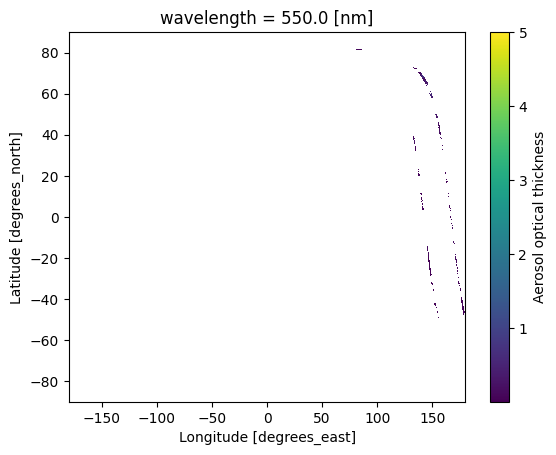

In [76]:
artist = dataset['aot'][:,:,7].plot(vmax=5)

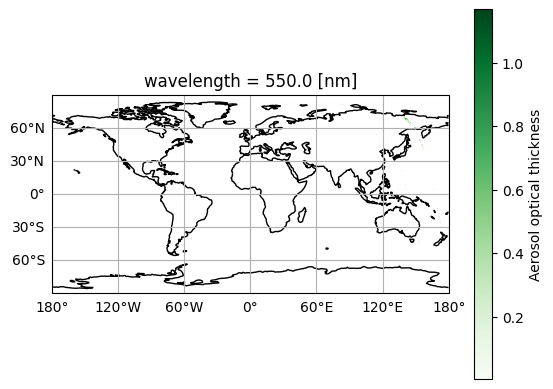

In [82]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
plot = dataset["aot"][:,:,7].plot(
    x="lon", y="lat", cmap="Greens", ax=ax
)